# TRABAJO APRENDIZAJE AUTOMÁTICO

Guzmán Muñoz Revuelta

Fernando Caruana del Pino

## OBJETIVOS DEL TRABAJO:
En este segundo trabajo, simularemos un "business case" con nuestra base de datos 'Base', donde la variable target es la de 'fraud_bool', que indica el número de fraudes que hay en el dataframe. En este trabajo crearemos un DICCIONARIO DE VARIABLES, en primer lugar las variables originales (raw) y procesadas. En este paso se intentará sacar valor de las variables. La evaluación de este modelo no es una tarea fácil, por lo que se varias realizarán métricas para observar su desempeño:

* **FEATURE ENGINEERING y SELECCIÓN DE VARIABLES:** proceso de ML que consiste en la creación y selección de características para mejorar el rendimiento de nuestro modelo predictivo. Para ello, se tratarán las variables relevantes para su correcto uso. Por ejemplo, cambiaremos el formato de las fechas de str (2019-01-01) a datetime.

* **MODELAJE DE LAS VARIABLES:** en este apartado se realizarán diferentes modelos como pueden ser árboles de decisión, Bayes o GLM. Además, en el modelo base se imputa la clase mayoritaria, como hicimos en nuestra práctica de Titanic.

* **MÉTRICA:** matriz de confusión (absolutos y relativos %), curva ROC, curva de Ganancia, curva Lift (parecida a la curva de Ganancia pero expresada en otra forma), F1, etc. 

En resumen, nuestro objetivo es convertir nuestra base, desde la transformación de datos a hasta la construcción de modelos variados, respaldado por una evaluación exhaustiva que nos permita entender el trabajo realizado. Además, se escogerá el mejor modelo de todos los trabajados en clase en la última parte de este trabajo. Para optimizarlo, se añadirán una serie de hiperparámetros.


# Variables
• income (numeric): Annual income of the applicant (in decile form). Ranges between [0.1, 0.9].

• name_email_similarity (numeric): Metric of similarity between email and applicant’s name. Higher values represent higher similarity. Ranges between [0, 1].

• prev_address_months_count (numeric): Number of months in previous registered address of the applicant, i.e. the applicant’s previous residence, if applicable. Ranges between [−1, 380] months (-1 is a missing value).

• current_address_months_count (numeric): Months in currently registered address of the applicant. Ranges between [−1, 429] months (-1 is a missing value).

• customer_age (numeric): Applicant’s age in years, rounded to the decade. Ranges between [10, 90] years.

• days_since_request (numeric): Number of days passed since application was done. Ranges between [0, 79] days.

• intended_balcon_amount (numeric): Initial transferred amount for application. Ranges between [−16, 114] (negatives are missing values).

• payment_type (categorical): Credit payment plan type. 5 possible (annonymized) values.

• zip_count_4w (numeric): Number of applications within same zip code in last 4 weeks. Ranges between [1, 6830].

• velocity_6h (numeric): Velocity of total applications made in last 6 hours i.e., average number of applications per hour in the last 6 hours. Ranges between [−175, 16818].

• velocity_24h (numeric): Velocity of total applications made in last 24 hours i.e., average number of applications per hour in the last 24 hours. Ranges between [1297, 9586]

• velocity_4w (numeric): Velocity of total applications made in last 4 weeks, i.e., average number of applications per hour in the last 4 weeks. Ranges between [2825, 7020].

• bank_branch_count_8w (numeric): Number of total applications in the selected bank branch in last 8 weeks. Ranges between [0, 2404].

• date_of_birth_distinct_emails_4w (numeric): Number of emails for applicants with same date of birth in last 4 weeks. Ranges between [0, 39].

• employment_status (categorical): Employment status of the applicant. 7 possible (annonymized) values.

• credit_risk_score (numeric): Internal score of application risk. Ranges between [−191, 389].

• email_is_free (binary): Domain of application email (either free or paid).

• housing_status (categorical): Current residential status for applicant. 7 possible (annonymized) values.

• phone_home_valid (binary): Validity of provided home phone.

• phone_mobile_valid (binary): Validity of provided mobile phone.

• bank_months_count (numeric): How old is previous account (if held) in months. Ranges between [−1, 32] months (-1 is a missing value).

• has_other_cards (binary): If applicant has other cards from the same banking company.

• proposed_credit_limit (numeric): Applicant’s proposed credit limit. Ranges between [200, 2000].

• foreign_request (binary): If origin country of request is different from bank’s country.

• source (categorical): Online source of application. Either browser (INTERNET) or app (TELEAPP).

• session_length_in_minutes (numeric): Length of user session in banking website in minutes. Ranges between [−1, 107] minutes (-1 is a missing value).

• device_os (categorical): Operative system of device that made request. Possible values are: Windows, macOS, Linux, X11, or other.

• keep_alive_session (binary): User option on session logout.

• device_distinct_emails (numeric): Number of distinct emails in banking website from the used device in last 8 weeks. Ranges between [−1, 2] emails (-1 is a missing value).

• device_fraud_count (numeric): Number of fraudulent applications with used device. Ranges between [0, 1].

• month (numeric): Month where the application was made. Ranges between [0, 7].

• fraud_bool (binary): If the application is fraudulent or not.

Al ser una base de datos anónima, hay algunas variables que no sabemos lo que significan, como puede ser 'employment_status', donde vienen 7 datos diferentes que son dos letras: CA,CB... 'housing_status' y 'payment_type' igual.

# SELECCIÓN DE VARIABLES

La primera parte de este trabajo consiste en la selección óptima de variables, donde se escogerán automáticamente las características de los datos que más contribuyen a la variable objetivo. Además, tenemos que trabajar solo con las variables más representativas, ya que la presencia de variables irrelevantes reducirá la precisión de alguna de las métricas que vamos a utilizar, especialmente los algoritmos lineales como la regresión lineal y logística. 

Los beneficios de realizar la selección de características antes de modelar sus datos son:

- Reduce el sobreajuste y Mejora la precisión en algunos modelos. En algunos casos, menos datos redundantes significa menos oportunidades de tomar decisiones basadas en el ruido.

- Reduce el tiempo de entrenamiento: Menos datos significa que los algoritmos se entrenan más rápido.

## IMPORTAMOS LIBRERÍAS

In [1]:
import pandas as pd 
import numpy as np
import sklearn
from sklearn.pipeline import Pipeline
from sklearn import metrics
# conda install category_encoders
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import metrics

#from sklearn.metrics import plot_confusion_matrix, roc_curve, roc_auc_score
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel, RFE
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

from boruta import BorutaPy # !conda install -c conda-forge boruta_py

## Lectura del dataset: train y test

bf_train -> 800.000 instancias

bf_test -> 200.000 instancias

In [2]:
bf_train = pd.read_csv("../data/train_pd_data_preprocessing_missing_outlier.csv")
bf_test = pd.read_csv("../data/test_pd_data_preprocessing_missing_outlier.csv")

El primer paso a seguir es eliminar la variable 'device_fraud_count', ya que es una variable que no aporta nada de información al trabajo (son todo 0): 

In [3]:
bf_train = bf_train.drop(['device_fraud_count'], axis=1)
bf_test = bf_test.drop(['device_fraud_count'], axis=1)  

In [4]:
bf_test

,Unnamed: 0,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,month,fraud_bool
0,607143,0.6,0.532791,-1,121,50,0.004671,-1.608770,AD,396,...,0,1000,0,INTERNET,6.987319,linux,0,1,6,0
1,952630,0.4,0.655692,-1,58,20,0.008313,51.178750,AA,1074,...,0,200,0,INTERNET,19.747368,windows,1,1,4,0
2,401087,0.1,0.869829,-1,354,60,0.011981,-0.521211,AB,929,...,0,200,0,INTERNET,2.138674,linux,1,1,1,0
3,477161,0.1,0.185111,31,207,20,0.012904,-0.606201,AB,2299,...,0,200,0,INTERNET,5.677184,linux,1,1,1,0
4,133502,0.7,0.124151,-1,57,30,0.013645,51.540936,AA,1496,...,0,500,0,INTERNET,3.317681,other,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,286970,0.7,0.856697,-1,63,30,0.013948,35.547833,AA,2388,...,1,200,0,INTERNET,7.004461,other,0,1,2,0
199996,372963,0.6,0.515747,-1,256,60,0.023523,-0.966747,AB,1175,...,1,1000,0,INTERNET,8.693469,linux,0,1,2,0
199997,925102,0.6,0.315535,30,16,30,8.818207,20.911347,AA,1736,...,1,500,0,TELEAPP,3.935820,other,0,1,4,0
199998,203857,0.1,0.470439,99,15,50,0.013798,-1.249123,AC,228,...,0,200,1,INTERNET,12.205053,linux,0,1,3,0


In [5]:
bf_test.columns

Index(['Unnamed: 0', 'income', 'name_email_similarity',
       'prev_address_months_count', 'current_address_months_count',
       'customer_age', 'days_since_request', 'intended_balcon_amount',
       'payment_type', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'employment_status',
       'credit_risk_score', 'email_is_free', 'housing_status',
       'phone_home_valid', 'phone_mobile_valid', 'bank_months_count',
       'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'source',
       'session_length_in_minutes', 'device_os', 'keep_alive_session',
       'device_distinct_emails_8w', 'month', 'fraud_bool'],
      dtype='object')

Lo segundo es eliminar la primera columna de nuestro train y test, que es el index. Al exportarlo como csv (en el 2_EDA), si luego lo importas sale esa primera columna irrelevante que no tiene ningún valor:

In [6]:
bf_train = bf_train.drop('Unnamed: 0', axis=1)
bf_test = bf_test.drop('Unnamed: 0', axis=1)

In [7]:
bf_train.dtypes

income                              float64
name_email_similarity               float64
prev_address_months_count             int64
current_address_months_count          int64
customer_age                          int64
days_since_request                  float64
intended_balcon_amount              float64
payment_type                         object
zip_count_4w                          int64
velocity_6h                         float64
velocity_24h                        float64
velocity_4w                         float64
bank_branch_count_8w                  int64
date_of_birth_distinct_emails_4w      int64
employment_status                    object
credit_risk_score                     int64
email_is_free                         int64
housing_status                       object
phone_home_valid                      int64
phone_mobile_valid                    int64
bank_months_count                     int64
has_other_cards                       int64
proposed_credit_limit           

Por último, para el preprocesado del dataset, se cambiará la variable source de categórica a numérica, creando una variable dummy donde 0 es 'INTERNET' (ha realizado el movimiento desde internet) y 1 es 'TELEAPP' (ha realizado el movimiento desde la aplicación). Esto se ha realizado para una mejor interpretación:

In [8]:
bf_train['source'] = bf_train['source'].replace({'INTERNET': 0, 'TELEAPP': 1})
bf_test['source'] = bf_test['source'].replace({'INTERNET': 0, 'TELEAPP': 1})

In [9]:
bf_test.columns

Index(['income', 'name_email_similarity', 'prev_address_months_count',
       'current_address_months_count', 'customer_age', 'days_since_request',
       'intended_balcon_amount', 'payment_type', 'zip_count_4w', 'velocity_6h',
       'velocity_24h', 'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'employment_status',
       'credit_risk_score', 'email_is_free', 'housing_status',
       'phone_home_valid', 'phone_mobile_valid', 'bank_months_count',
       'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'source',
       'session_length_in_minutes', 'device_os', 'keep_alive_session',
       'device_distinct_emails_8w', 'month', 'fraud_bool'],
      dtype='object')

In [10]:
bf_train.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
income,800000.0,0.562593,0.290250,1.000000e-01,0.300000,0.600000,0.800000,0.900000
name_email_similarity,800000.0,0.493992,0.289254,1.434550e-06,0.225179,0.492608,0.755997,0.999999
prev_address_months_count,800000.0,16.719916,44.063046,-1.000000e+00,-1.000000,-1.000000,12.000000,381.000000
current_address_months_count,800000.0,86.595036,88.386506,-1.000000e+00,19.000000,52.000000,130.000000,428.000000
customer_age,800000.0,33.686138,12.024296,1.000000e+01,20.000000,30.000000,40.000000,90.000000
days_since_request,800000.0,1.027018,5.382773,4.036860e-09,0.007195,0.015165,0.026338,78.456904
intended_balcon_amount,800000.0,8.680720,20.242947,-1.553055e+01,-1.181406,-0.830517,5.298009,112.956928
zip_count_4w,800000.0,1572.894765,1005.705349,1.000000e+00,894.000000,1263.000000,1944.000000,6700.000000
velocity_6h,800000.0,5666.223828,3008.732655,-1.706031e+02,3437.430623,5319.464158,7681.022091,16715.565404
velocity_24h,800000.0,4770.557176,1479.819492,1.300307e+03,3593.473797,4750.209154,5754.042557,9506.896596


In [11]:
import os
os.getcwd()

'c:\\Users\\guzzm\\Desktop\\APRENDIZAJE AUTOMATICO\\fraud_bool_ML\\notebooks'

In [12]:
bf_train.to_csv("../data/train_1.csv")
bf_test.to_csv("../data/test_1.csv")

## Codificación de la variable objetivo y del resto de variables categoricas

In [13]:
bf_train['fraud_bool'].unique()

array([0, 1], dtype=int64)

In [14]:
bf_train['fraud_bool'].value_counts()

0    791177
1      8823
Name: fraud_bool, dtype: int64

C:\Users\guzzm\AppData\Local\Temp\ipykernel_22780\1198027055.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=bf_train, x='fraud_bool', palette=colors)


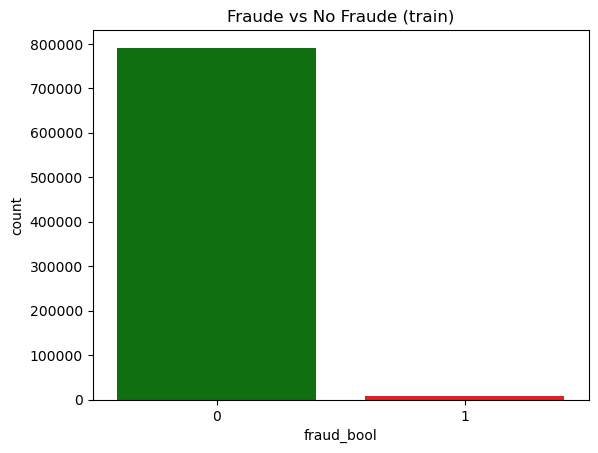

In [15]:
import seaborn as sns

colors = ['green', 'red']
sns.countplot(data=bf_train, x='fraud_bool', palette=colors)

plt.title('Fraude vs No Fraude (train)')
plt.show()


Realizamos un gráfico de correlaciones de las variables continuas para observar un poco como se comportan entre sí:

C:\Users\guzzm\AppData\Local\Temp\ipykernel_22780\3052369511.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = bf_train.corr()


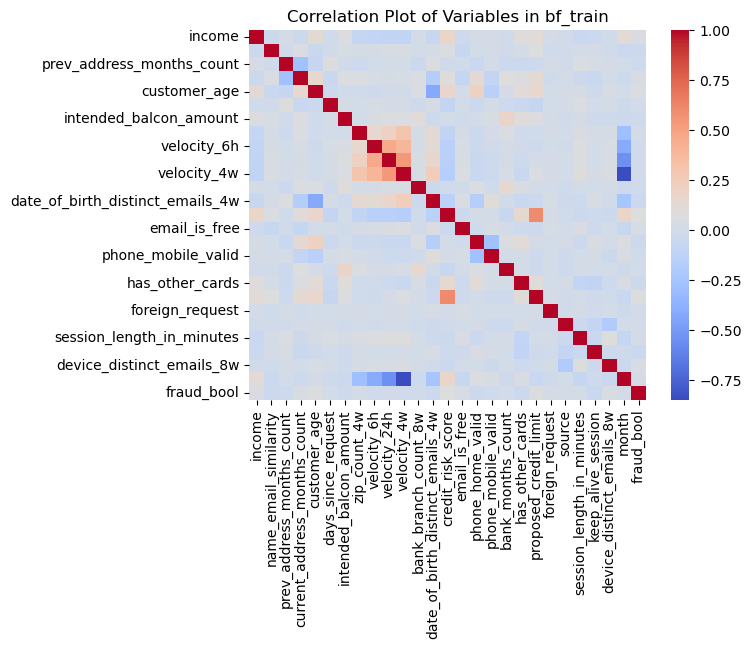

In [16]:
import seaborn as sns

correlation_matrix = bf_train.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Plot of Variables in bf_train')
plt.show()


**En este paso creamos las siguientes variables, que son fundamentales para el correcto desarrollo del trabajo:**

y_train: extraemos la variable target 'fraud_bool' de bf_train (800.000 instancias), donde 'fraud_bool' es una variable dummy (1 es Fraude y 0 es No Fraude)

y_test: lo mismo que el y_train pero en el test hay solo 200.000 instancias.

X_train: eliminamos de bf_train la variable objetivo.

X_test: eliminamos de bf_test la variable objetivo.

In [17]:
y_train = bf_train['fraud_bool']
y_test = bf_test['fraud_bool']
X_train = bf_train.drop('fraud_bool',axis=1)
X_test = bf_test.drop('fraud_bool',axis=1)

In [18]:
y_test

0         0
1         0
2         0
3         0
4         0
         ..
199995    0
199996    0
199997    0
199998    0
199999    0
Name: fraud_bool, Length: 200000, dtype: int64

In [19]:
X_test

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,...,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,month
0,0.6,0.532791,-1,121,50,0.004671,-1.608770,AD,396,4524.562084,...,11,0,1000,0,0,6.987319,linux,0,1,6
1,0.4,0.655692,-1,58,20,0.008313,51.178750,AA,1074,7728.585220,...,21,0,200,0,0,19.747368,windows,1,1,4
2,0.1,0.869829,-1,354,60,0.011981,-0.521211,AB,929,7078.517070,...,1,0,200,0,0,2.138674,linux,1,1,1
3,0.1,0.185111,31,207,20,0.012904,-0.606201,AB,2299,4057.943868,...,28,0,200,0,0,5.677184,linux,1,1,1
4,0.7,0.124151,-1,57,30,0.013645,51.540936,AA,1496,6268.181291,...,10,0,500,0,0,3.317681,other,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0.7,0.856697,-1,63,30,0.013948,35.547833,AA,2388,6060.140270,...,1,1,200,0,0,7.004461,other,0,1,2
199996,0.6,0.515747,-1,256,60,0.023523,-0.966747,AB,1175,6144.561330,...,20,1,1000,0,0,8.693469,linux,0,1,2
199997,0.6,0.315535,30,16,30,8.818207,20.911347,AA,1736,7530.576613,...,3,1,500,0,1,3.935820,other,0,1,4
199998,0.1,0.470439,99,15,50,0.013798,-1.249123,AC,228,6802.065753,...,-1,0,200,1,0,12.205053,linux,0,1,3


Dividimos la variable X_train (que es el 80% del dataset) en un 60% de X_train y un 20% en X_val:

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_val = train_test_split(X_train, test_size=0.2, random_state=42)


In [21]:
X_train

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,...,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,month
52811,0.4,0.650832,-1,45,30,0.005250,33.523283,AA,1955,2732.832976,...,16,1,1500,0,0,3.539006,other,0,1,2
475516,0.2,0.218104,-1,181,20,0.024387,49.804802,AB,763,7666.676987,...,1,0,200,0,0,11.451453,linux,1,1,4
122130,0.2,0.902302,-1,304,40,0.003966,-0.192401,AC,876,7069.649109,...,-1,0,1500,0,0,5.266996,other,0,1,5
701379,0.9,0.887211,-1,194,20,0.036376,51.308258,AA,656,3492.447769,...,29,0,1000,0,0,1.844868,x11,1,1,6
672853,0.5,0.908950,-1,201,30,0.035135,51.044705,AA,787,7511.429591,...,15,0,200,0,0,4.351387,linux,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,0.6,0.794897,-1,69,30,0.008395,-1.216343,AC,1930,4183.599056,...,-1,1,500,0,0,4.474191,linux,0,1,2
365838,0.8,0.619064,28,4,50,0.001330,2.226235,AA,2549,15417.463566,...,22,0,500,0,0,1.522870,linux,0,1,1
131932,0.9,0.208381,-1,118,40,0.004242,-0.463738,AD,1446,5655.474817,...,5,0,1500,0,0,3.583945,windows,1,1,0
671155,0.7,0.878543,-1,206,40,0.024074,-1.632316,AB,936,7611.987448,...,25,0,1000,0,0,15.964135,windows,0,1,2


In [22]:
X_val

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,...,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,month
212188,0.5,0.250768,27,11,30,0.023615,-1.010620,AC,1992,5227.894257,...,-1,0,200,0,0,4.680739,other,1,1,2
299036,0.7,0.591037,-1,39,30,0.004256,-0.447685,AA,1183,10593.839712,...,28,0,200,0,0,5.837523,macintosh,1,1,1
475978,0.1,0.850289,-1,249,20,0.020546,-0.407993,AC,4352,5741.394926,...,2,0,200,0,0,35.757821,windows,1,1,2
588988,0.9,0.139066,-1,47,50,0.012976,-1.443939,AC,578,899.803435,...,-1,0,1000,0,0,5.267001,linux,1,1,5
138859,0.8,0.498309,34,2,30,0.018767,-1.098560,AC,1048,5830.291072,...,15,1,1000,0,0,4.253402,other,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419306,0.6,0.128432,-1,41,30,0.005476,-1.339149,AD,1397,7368.451578,...,31,0,1500,0,0,6.062664,windows,1,1,3
390253,0.8,0.786829,12,24,30,3.364546,-0.979698,AC,1469,4480.396200,...,27,0,200,0,0,8.117757,windows,0,1,7
490030,0.3,0.424040,34,15,20,8.845660,34.153342,AA,686,7925.260115,...,25,0,200,0,0,4.194908,windows,1,1,0
754179,0.6,0.547631,-1,42,70,0.012004,26.475073,AA,1040,8098.955113,...,15,0,200,0,0,13.747438,windows,1,1,3


Hacemos lo mismo para la variable y_train:

In [23]:
from sklearn.model_selection import train_test_split

y_train, y_val = train_test_split(y_train, test_size=0.2, random_state=42)  

In [24]:
y_train.value_counts()

0    632979
1      7021
Name: fraud_bool, dtype: int64

# Modelo

# Regulación Ridge

*¿Qué es?* Es una técnica utilizada para evitar el sobre ajuste (overfitting) y mejorar el modelo en general. En el contexto de la regresión lineal, la función objetivo es típicamente la suma de los cuadrados de las diferencias entre las predicciones del modelo y los valores reales (error cuadrático). La regularización Ridge agrega un término adicional a esta función objetivo, que es proporcional a la suma de los cuadrados de los coeficientes de la regresión multiplicados por un parámetro de regularización, comúnmente denotado como λ (lambda).

In [25]:
from sklearn.linear_model import Ridge
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Identificación de columnas numéricas y categóricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()

# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
    steps=[('scaler', StandardScaler())]
)

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
    steps=[('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, cat_cols)
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
).set_output(transform="pandas")

# Pipeline con regularización Ridge
pipe = Pipeline([
    ('preprocessing', preprocessor),
    ('modelo', Ridge(alpha=1.0))  # Puedes ajustar el valor de alpha según tu necesidad
])

# Train
_ = pipe.fit(X=X_train, y=y_train)



Hemos ido probando con diferentes threshold ya que al principio nos seleccionaba toda la muestra, y tras varios intentos hemos elegido el threshold = 0.25:

In [26]:
sel_ridge = SelectFromModel(Ridge(alpha=1.0), threshold=0.25)
sel_ridge.fit(pipe.named_steps['preprocessing'].transform(X_train), y_train)

SelectFromModel(estimator=Ridge(), threshold=0.25)

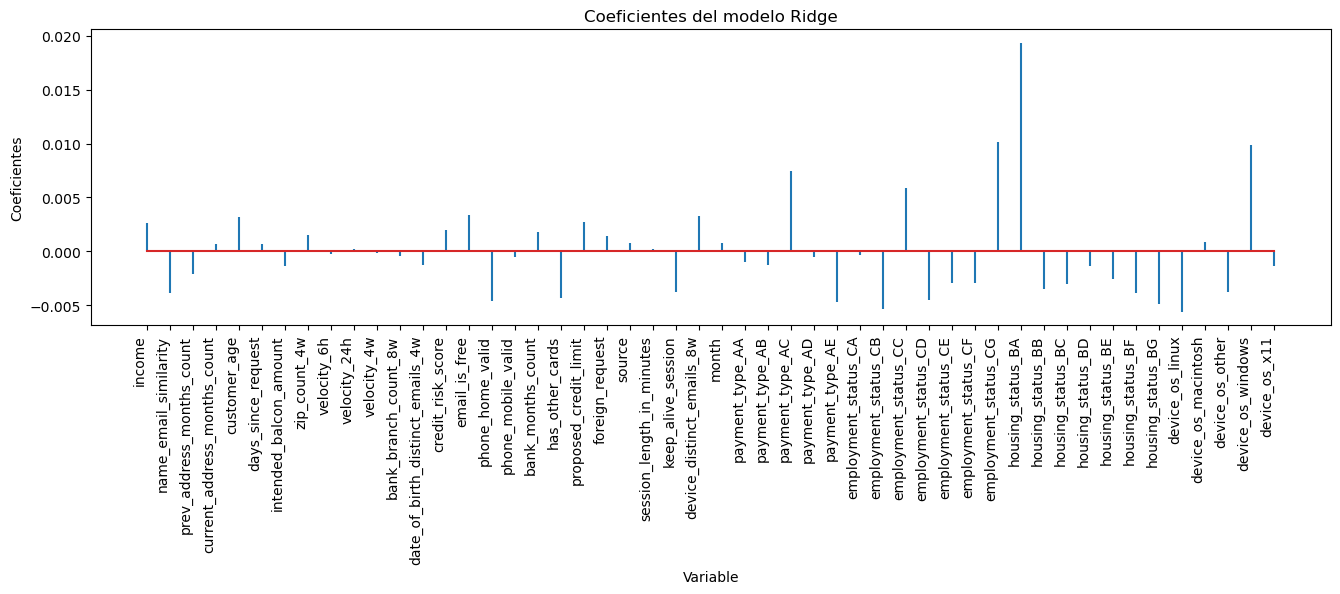

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

# Obtener los nombres de las variables después del preprocesamiento
feature_names = pipe.named_steps['preprocessing'].get_feature_names_out()

# Coeficientes del modelo Ridge
df_coeficientes = pd.DataFrame({
    'predictor': feature_names,
    'coef': sel_ridge.estimator_.coef_.flatten()
})

# Crear el gráfico
fig, ax = plt.subplots(figsize=(16, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('Variable')
ax.set_ylabel('Coeficientes')
ax.set_title('Coeficientes del modelo Ridge')
plt.show()


# REGULACIÓN LASSO

*¿Qué es?* La regulación LASSO (Least Absolute Shrinkage and Selection Operator) es otra técnica utilizada en modelos de regresión para prevenir el sobreajuste (overfitting) y mejorar el modelo. Al igual que la regularización Ridge, la regularización Lasso agrega un término adicional a la función objetivo del modelo, pero en lugar de utilizar la suma de los cuadrados de los coeficientes, utiliza la suma de los valores absolutos de los coeficientes.

Creamos un nuevo pipeline para la regulación Lasso:

In [28]:
from sklearn.linear_model import Lasso
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Identificación de columnas numéricas y categóricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()

# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
    steps=[('scaler', StandardScaler())]
)

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
    steps=[('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, cat_cols)
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
).set_output(transform="pandas")

# Pipeline con regularización Lasso y nuevo valor de alpha
alpha_value = 0.001  # Puedes ajustar el valor de alpha según tu necesidad
lasso_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('modelo', Lasso(alpha=alpha_value, max_iter=10000))  # max_iter es importante para convergencia
])

# Train
_ = lasso_pipeline.fit(X=X_train, y=y_train)


In [29]:
('modelo', Lasso(alpha=alpha_value, max_iter=20000))

('modelo', Lasso(alpha=0.001, max_iter=20000))

In [30]:
import time

start_time = time.time()

sel_lasso = SelectFromModel(LogisticRegression(C=1, penalty='l1', 
                                         solver='liblinear'), threshold = 0.06)
sel_lasso.fit(pipe.named_steps['preprocessing'].transform(X_train), y_train)

end_time = time.time()

elapsed_time_seconds = end_time - start_time

elapsed_minutes = int(elapsed_time_seconds // 60)
elapsed_seconds = int(elapsed_time_seconds % 60)

print(f"El script tardó {elapsed_minutes} minutos y {elapsed_seconds} segundos en ejecutarse.")

El script tardó 9 minutos y 21 segundos en ejecutarse.


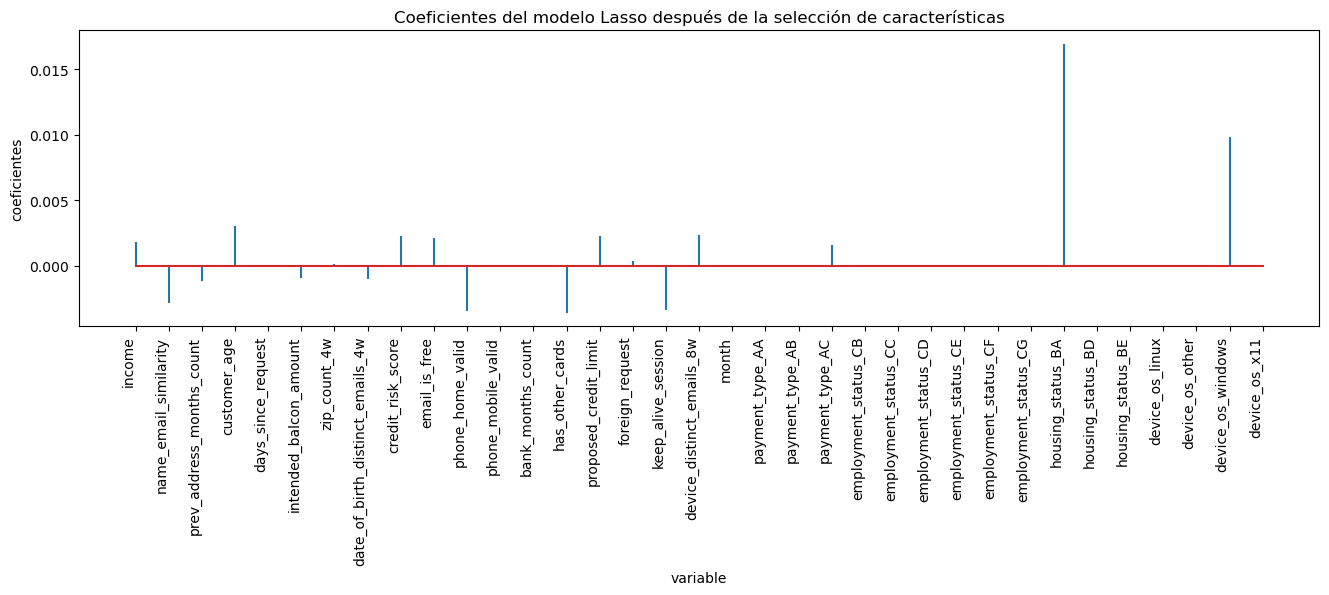

In [31]:
# Coeficientes del modelo Lasso
df_coeficientes_lasso = pd.DataFrame(
    {'predictor': lasso_pipeline.named_steps['preprocessing'].get_feature_names_out(),
     'coef': lasso_pipeline.named_steps['modelo'].coef_}
)

# Filtrar solo las características seleccionadas por Lasso
df_coeficientes_lasso = df_coeficientes_lasso.loc[sel_lasso.get_support()]

# Visualizar los coeficientes del modelo Lasso
fig, ax = plt.subplots(figsize=(16, 3.84))
ax.stem(df_coeficientes_lasso.predictor, df_coeficientes_lasso.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo Lasso después de la selección de características')

plt.show()

In [32]:
print(df_coeficientes_lasso)


                           predictor      coef
0                             income  0.001804
1              name_email_similarity -0.002799
2          prev_address_months_count -0.001135
4                       customer_age  0.003056
5                 days_since_request  0.000000
6             intended_balcon_amount -0.000896
7                       zip_count_4w  0.000157
12  date_of_birth_distinct_emails_4w -0.001002
13                 credit_risk_score  0.002263
14                     email_is_free  0.002122
15                  phone_home_valid -0.003438
16                phone_mobile_valid -0.000000
17                 bank_months_count  0.000000
18                   has_other_cards -0.003556
19             proposed_credit_limit  0.002272
20                   foreign_request  0.000397
23                keep_alive_session -0.003343
24         device_distinct_emails_8w  0.002354
25                             month  0.000000
26                   payment_type_AA -0.000000
27           

## <font color = 'lightgreen'> COMPARACIÓN RIDGE vs LASSO

Como ya hemos comentado anteriormente Ridge y Lasso son técnicas de regularización utilizadas en modelos de regresión lineal para abordar el sobreajuste y mejorar la generalización del modelo. La principal diferencia radica en la forma en que aplican la penalización a los coeficientes.

Ridge agrega un término de regularización a la función objetivo que es proporcional a la suma de los cuadrados de los coeficientes. Este término de regularización, basado en la norma L2, ayuda a controlar coeficientes grandes y a prevenir el sobreajuste. Sin embargo, no tiende a establecer coeficientes exactamente en cero, lo que significa que todas las características contribuyen al modelo, aunque algunas pueden tener un impacto menor.

Por otro lado, Lasso utiliza una penalización basada en la norma L1, que es proporcional a la suma de los valores absolutos de los coeficientes. La característica distintiva de Lasso es su capacidad para inducir dispersión de coeficientes, llevando a la selección de características. Algunos coeficientes se establecen exactamente en cero, lo que implica que Lasso puede eliminar características menos importantes, facilitando la interpretación del modelo.

Además, Ridge tiende a funcionar bien con características altamente correlacionadas, asignando pesos similares a todas ellas, mientras que Lasso puede tener dificultades en la selección de una característica en presencia de correlaciones fuertes.

En resumen, Ridge y Lasso ofrecen enfoques distintos para la regularización, con Ridge favoreciendo la estabilidad de los coeficientes y Lasso permitiendo la selección automática de características al establecer algunos coeficientes en cero. La elección entre ellos depende de las características de los datos y de los objetivos específicos del modelado.

In [33]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectFromModel

numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()

numeric_transformer = Pipeline(
    steps=[('scaler', StandardScaler())]
)

categorical_transformer = Pipeline(
    steps=[('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, cat_cols)
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
).set_output(transform="pandas")


# ElasticNet
elasticnet_pipe = Pipeline([
    ('preprocessing', preprocessor),
    ('modelo', ElasticNet(alpha=0.001, l1_ratio=0.5, max_iter=10000)) 
])
elasticnet_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['income',
                                                   'name_email_similarity',
                                                   'prev_address_months_count',
                                                   'current_address_months_count',
                                                   'customer_age',
                                                   'days_since_request',
                                                   'intended_balcon_amount',
                                                   'zip_count_4w',
                                                   'velocity_6h',
                                                   'velocity_24h',
                                                   'veloc...
                                                   'foreign_request', 'source',
                                                   'session_length_in_minutes',
                                                   'keep_alive_session',
                                                   'device_distinct_emails_8w',
                                                   'month']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['payment_type',
                                                   'employment_status',
                                                   'housing_status',
                                                   'device_os'])],
                                   verbose_feature_names_out=False)),
                ('modelo', ElasticNet(alpha=0.001, max_iter=10000))])

In [34]:
from sklearn.metrics import mean_squared_error, r2_score

# Predicciones de Ridge y Lasso en el conjunto de prueba
ridge_predictions = pipe.predict(X_test)
lasso_predictions = lasso_pipeline.predict(X_test)
elasticnet_predictions = elasticnet_pipe.predict(X_test)

# Métricas de evaluación
ridge_mse = mean_squared_error(y_test, ridge_predictions)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
elasticnet_mse = mean_squared_error(y_test, elasticnet_predictions)


ridge_r2 = r2_score(y_test, ridge_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)
elasticnet_r2 = r2_score(y_test, elasticnet_predictions)

print("MSE del modelo Ridge:", ridge_mse)
print("MSE del modelo Lasso:", lasso_mse)
print("MSE del modelo ElasticNet:", elasticnet_mse)


print("\nR^2 del modelo Ridge:", ridge_r2)
print("R^2 del modelo Lasso:", lasso_r2)
print("R^2 del modelo ElasticNet:", elasticnet_r2)

MSE del modelo Ridge: 0.010541104410636031
MSE del modelo Lasso: 0.010581412470713493
MSE del modelo ElasticNet: 0.010556019534175905

R^2 del modelo Ridge: 0.03366549994434698
R^2 del modelo Lasso: 0.029970339782204425
R^2 del modelo ElasticNet: 0.03229818605694912


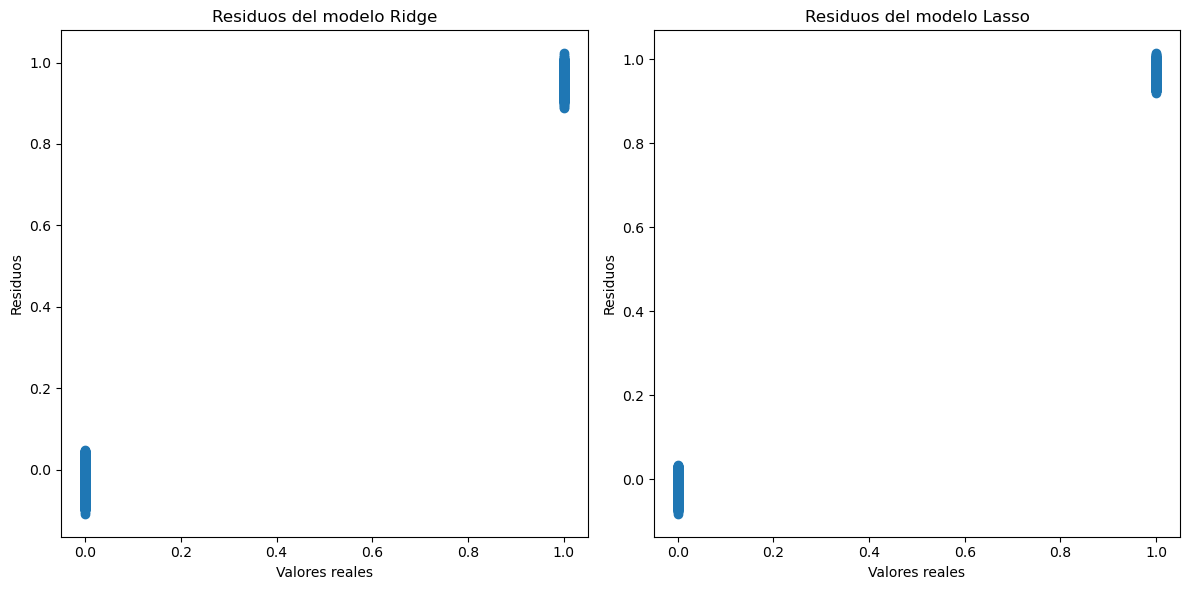

In [35]:
# Análisis de residuos
ridge_residuals = y_test - ridge_predictions
lasso_residuals = y_test - lasso_predictions

# Visualización de residuos
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, ridge_residuals)
plt.title('Residuos del modelo Ridge')
plt.xlabel('Valores reales')
plt.ylabel('Residuos')

plt.subplot(1, 2, 2)
plt.scatter(y_test, lasso_residuals)
plt.title('Residuos del modelo Lasso')
plt.xlabel('Valores reales')
plt.ylabel('Residuos')

plt.tight_layout()
plt.show()


In [36]:
from sklearn.metrics import accuracy_score

# Ridge
ridge_predictions_binary = (ridge_predictions >= 0.5).astype(int)
ridge_accuracy = accuracy_score(y_test, ridge_predictions_binary)
print(f'Ridge Accuracy: {ridge_accuracy:.4f}')

# Lasso
lasso_predictions_binary = (lasso_predictions >= 0.5).astype(int)
lasso_accuracy = accuracy_score(y_test, lasso_predictions_binary)
print(f'Lasso Accuracy: {lasso_accuracy:.4f}')

# ElasticNet
elasticnet_predictions_binary = (elasticnet_predictions >= 0.5).astype(int)
elasticnet_accuracy = accuracy_score(y_test, elasticnet_predictions_binary)
print(f'ElasticNet Accuracy: {elasticnet_accuracy:.4f}')


Ridge Accuracy: 0.9890
Lasso Accuracy: 0.9890
ElasticNet Accuracy: 0.9890


# RFE

*¿Qué es?* El RFE (Recursive Feature Elimination) es una técnica utilizada para la selección de variables. Su objetivo es mejorar la eficiencia y el rendimiento de los modelos al identificar y retener las características más relevantes para la tarea de predicción.

In [37]:
model = LogisticRegression(max_iter=1000)

In [38]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt


# Identificación de columnas numéricas y categóricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()

# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
    steps=[('scaler', StandardScaler())]
)

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
    steps=[('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, cat_cols)
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
).set_output(transform="pandas")

# Pipeline con RFE y modelo de regresión logística
model = LogisticRegression()
rfe_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('feature_selection', RFE(model, n_features_to_select=10)),  # Ajusta n_features_to_select según sea necesario
    ('model', model)
])

